In [175]:
import re
import string
import itertools
from nltk import bigrams #pay attention to the 's' of bigrams
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import numpy as np
import csv
import json
import nltk
import operator
from collections import Counter
import gensim
from gensim import corpora
from os import listdir
from os.path import isfile,join
import nltk


# read from files as dataframe
def read_as_df(folder,filename):
    filename=filename.split('.')[0]
    filepath=folder+filename+'.txt'
    df = pd.read_csv(filepath, delimiter="^", header=None,error_bad_lines=False,engine='python')
    df.columns = ["tweets", "time", "date"]
    df['account']=filename 
    return df


# read from files as list 
def read_as_list(filepath):
    with open(filepath) as txt_file:
        lines = txt_file.readlines()
        e_list = []
        for line in lines:
            e_list.append(line)  # store the text into a list # 27608
        return e_list

# drop repetitive words
def strip_drop_duplicated(input_list):
    tem_list=[tweet.strip() for tweet in input_list] #drop the space at the beginning and in the end
    tem_list=list(set(tem_list)) # drop the duplicated # 25600
    return tem_list

# remove all the symbols and non-english words
def remove_symbols(input_list):
    #format:[[],[],[]]
    regex_str = [
        #emoticons_str,
        #r'<[^>]+>',  # HTML tags
        #r'(?:@[\w_]+)',  # @-mentions
        #r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)",  # hash-tags
        #r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',  # URLs
        #r'(?:(?:\d+,?)+(?:\.?\d+)?)',  # numbers
        #r"(?:[a-z][a-z'\-_]+[a-z])",  # words with - and '
        #r'(?:[\w_]+)',  # other words
        #r'(?:\S)'  # anything else
    ]

    punctuation=set(string.punctuation)


    POS_f_list=[]

    for tweet in input_list:
        #print(tweet)
        tokens=tweet.split(' ')
        #tokens=tokens_re.findall(tweet)  # tokens is a list   # token is word
        tokens = [ token.lower() for token in tokens]
        tokens = [ re.sub(r'<[^>]+>','',token) for token in tokens]
        tokens = [ re.sub(r'(?:@[\w_]+)','',token) for token in tokens]
        #tokens = [ re.sub(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)",'',token) for token in tokens]
        tokens = [ re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+','',token) for token in tokens]
        tokens = [ re.sub(r'(?:(?:\d+,?)+(?:\.?\d+)?)','',token) for token in tokens]
        tokens = [ re.sub(r'[!?+]','',token) for token in tokens]
        tokens = [ re.sub(r'\&[\w]+[;]?','',token) for token in tokens]
        tokens = [ re.sub(r'[\w]+[.]+[\w]+','',token) for token in tokens]
        tokens = ['' if token in punctuation else token for token in tokens]
        tokens = ['' if len(token)==1 else token for token in tokens]


        result=[]
        for text in tokens:
            try:
                word=re.search(r"(?:^[a-z]+[a-z'\-_]?[a-z]+)",text).group(0)
                result.append(word)
            except:
                pass

        tokens = nltk.pos_tag(result)
        #tokens= [words[0] for words in tokens if words[1] in ['NN','NNS','NNP','NNPS']]
        tokens= [words[0] for words in tokens]
        POS_f_list.append(tokens)
        #remove the '' after the replace of symbols in words
        #for i in range(tokens.count('')):
            #tokens.remove('')
        #token_list.append(result)

    #get rid of all the [] in tweets
    new_tweets_list=[]
    for i in POS_f_list:
        if i==[]:
            pass
        else:
            new_tweets_list.append(i)
            #print(i)
    return new_tweets_list


# make some words like 'gooood' to 'good'
def standardize(input_list):
    standardize_tweet_list=[]
    for tweet in input_list:
        standardize_tweet=[''.join(''.join(s)[:2] for _, s in itertools.groupby(word)) for word in tweet]
        standardize_tweet_list.append(standardize_tweet)
    return standardize_tweet_list

# list from: Twitter-LDA/data/stoplist.txt & Twitter-LDA/src/Common/Stopwords.java
# remove stop words
def stop_word_removal(input_list):
    nonstopwd_tweets_list=[]
    swords_mlist=['ah',
'da',
'de',
'di',
'eh',
'ga',
'ha',
'je',
'ke',
'la',
'le',
'lo',
'lu',
'ma',
'ni',
'tu',
'uh',
'wa',
'xx',
'ya',
'dah',
'hah',
'heh',
'lah',
'leh',
'wah',
'wat',
'wow',
'yay',
'zzz',
"a",
"able",
"about",
"above",
"according",
"accordingly",
"across",
"actually",
"after",
"afterwards",
"again",
"against",
"all",
"allow",
"allows",
"almost",
"alone",
"along",
"already",
"also",
"although",
"always",
"am",
"among",
"amongst",
"amp",
"an",
"and",
"another",
"any",
"anybody",
"anyhow",
"anyone",
"anything",
"anyway",
"anyways",
"anywhere",
"apart",
"appear",
"appreciate",
"appropriate",
"are",
"around",
"as",
"aside",
"ask",
"asking",
"associated",
"at",
"available",
"away",
"awfully",
"b",
"be",
"became",
"because",
"become",
"becomes",
"becoming",
"been",
"before",
"beforehand",
"behind",
"being",
"believe",
"below",
"beside",
"besides",
"best",
"better",
"between",
"beyond",
"both",
"brief",
"but",
"by",
"c",
"came",
"can",
"cannot",
"cant",
"cause",
"causes",
"certain",
"certainly",
"changes",
"clearly",
"co",
"com",
"come",
"comes",
"concerning",
"consequently",
"consider",
"considering",
"contain",
"containing",
"contains",
"corresponding",
"could",
"course",
"currently",
"d",
"definitely",
"described",
"despite",
"did",
"different",
"do",
"does",
"doing",
"done",
"down",
"downwards",
"during",
"e",
"each",
"edu",
"eg",
"eight",
"either",
"else",
"elsewhere",
"enough",
"entirely",
"especially",
"et",
"etc",
"even",
"ever",
"every",
"everybody",
"everyone",
"everything",
"everywhere",
"ex",
"exactly",
"example",
"except",
"f",
"far",
"few",
"fifth",
"first",
"five",
"followed",
"following",
"follows",
"for",
"former",
"formerly",
"forth",
"four",
"from",
"further",
"furthermore",
"g",
"get",
"gets",
"getting",
"given",
"gives",
"go",
"goes",
"going",
"gone",
"got",
"gotten",
"greetings",
"h",
"had",
"happens",
"hardly",
"has",
"have",
"having",
"he",
"hello",
"help",
"hence",
"her",
"here",
"hereafter",
"hereby",
"herein",
"hereupon",
"hers",
"herself",
"hi",
"him",
"himself",
"his",
"hither",
"hopefully",
"how",
"howbeit",
"however",
"i",
"ie",
"if",
"ignored",
"immediate",
"in",
"inasmuch",
"inc",
"indeed",
"indicate",
"indicated",
"indicates",
"inner",
"insofar",
"instead",
"into",
"inward",
"is",
"it",
"its",
"itself",
"j",
"just",
"k",
"keep",
"keeps",
"kept",
"know",
"knows",
"known",
"l",
"last",
"lately",
"later",
"latter",
"latterly",
"least",
"less",
"lest",
"let",
"like",
"liked",
"likely",
"little",
"ll",
"look",
"looking",
"looks",
"ltd",
"m",
"mainly",
"many",
"may",
"maybe",
"me",
"mean",
"meanwhile",
"merely",
"might",
"more",
"moreover",
"most",
"mostly",
"much",
"must",
"my",
"myself",
"n",
"name",
"namely",
"nd",
"near",
"nearly",
"necessary",
"need",
"needs",
"neither",
"never",
"nevertheless",
"new",
"next",
"nine",
"no",
"nobody",
"non",
"none",
"noone",
"nor",
"normally",
"not",
"nothing",
"novel",
"now",
"nowhere",
"o",
"obviously",
"of",
"off",
"often",
"oh",
"ok",
"okay",
"old",
"on",
"once",
"one",
"ones",
"only",
"onto",
"or",
"other",
"others",
"otherwise",
"ought",
"our",
"ours",
"ourselves",
"out",
"outside",
"over",
"overall",
"own",
"p",
"particular",
"particularly",
"per",
"perhaps",
"placed",
"please",
"plus",
"possible",
"presumably",
"probably",
"provides",
"q",
"que",
"quite",
"qv",
"r",
"rather",
"rd",
"re",
"really",
"reasonably",
"regarding",
"regardless",
"regards",
"relatively",
"respectively",
"right",
"s",
"said",
"same",
"saw",
"say",
"saying",
"says",
"second",
"secondly",
"see",
"seeing",
"seem",
"seemed",
"seeming",
"seems",
"seen",
"self",
"selves",
"sensible",
"sent",
"serious",
"seriously",
"seven",
"several",
"shall",
"she",
"should",
"since",
"six",
"so",
"some",
"somebody",
"somehow",
"someone",
"something",
"sometime",
"sometimes",
"somewhat",
"somewhere",
"soon",
"sorry",
"specified",
"specify",
"specifying",
"still",
"sub",
"such",
"sup",
"sure",
"t",
"take",
"taken",
"tell",
"tends",
"th",
"than",
"thank",
"thanks",
"thanx",
"that",
"thats",
"the",
"their",
"theirs",
"them",
"themselves",
"then",
"thence",
"there",
"thereafter",
"thereby",
"therefore",
"therein",
"theres",
"thereupon",
"these",
"they",
"think",
"third",
"this",
"thorough",
"thoroughly",
"those",
"though",
"three",
"through",
"throughout",
"thru",
"thus",
"to",
"together",
"too",
"took",
"toward",
"towards",
"tried",
"tries",
"truly",
"try",
"trying",
"twice",
"two",
"u",
"un",
"under",
"unfortunately",
"unless",
"unlikely",
"until",
"unto",
"up",
"upon",
"us",
"use",
"used",
"useful",
"uses",
"using",
"usually",
"uucp",
"v",
"value",
"various",
"ve",
"very",
"via",
"viz",
"vs",
"w",
"want",
"wants",
"was",
"way",
"we",
"welcome",
"well",
"went",
"were",
"what",
"whatever",
"when",
"whence",
"whenever",
"where",
"whereafter",
"whereas",
"whereby",
"wherein",
"whereupon",
"wherever",
"whether",
"which",
"while",
"whither",
"who",
"whoever",
"whole",
"whom",
"whose",
"why",
"will",
"willing",
"wish",
"with",
"within",
"without",
"wonder",
"would",
"would",
"x",
"y",
"yes",
"yet",
"you",
"your",
"yours",
"yourself",
"yourselves",
"z",
"zero",
"i'm",
"he's",
"she's",
"you're",
"i'll",
"you'll",
"she'll",
"he'll",
"it's",
"don't",
"can't",
"didn't",
"i've",
"that's",
"there's",
"isn't",
"what's",
"rt",
"doesn't",
"w/",
"w/o",
"#pb#po",
"#pb#re",
"#pb#rt",
"#pb#me" ,
"share",
"time",
"today", 
"weekend", 
"we’re", "world", "pm", "time", "dn"
]
    for tweet in input_list:
        nonstopwd_tweets=[word for word in tweet if word not in (stopwords.words('english'))]
        nonstopwd_tweets=[word for word in tweet if word not in swords_mlist]
        nonstopwd_tweets_list.append(nonstopwd_tweets)
    return nonstopwd_tweets_list

# lematize the word from worked to work
def lematization(input_list):
    lemma_tweets_list=[]
    lemma = WordNetLemmatizer()
    for tweet in input_list:
        lemma_tweet=[lemma.lemmatize(word) for word in tweet]
        lemma_tweets_list.append(lemma_tweet)
    return lemma_tweets_list

# count the word frequency
def term_frequency(text):
    count_all = Counter()
    final_list = []
    for tweet in text:
        for word in tweet:
            final_list.append(word)
    count_all.update(final_list)
    return count_all
        
def list_to_string(input_list):
    result_list=[]
    for tweet in input_list:
        line=' '.join(tweet)
        result_list.append(line)
    return result_list

In [367]:
#positive dataframe
samsungsg_df=read_as_df('/Users/yyb/Documents/5920_Projects/New_data_collection_0312/Positive/','SamsungSG')
samsungsg_df=samsungsg_df.dropna().reset_index(drop=True)

#negative dataframe
negative_folder_path='/Users/yyb/Documents/5920_Projects/New_data_collection_0312/Negative/'
negative_filenames=[f for f in listdir(negative_folder_path) if isfile(join(negative_folder_path,f))]
try:
    negative_filenames.remove('.DS_Store')
    negative_filenames.remove('negative_v1.txt') # the final combine file, have only one column
except:
    pass

for name in negative_filenames:
    name=name.split('.')[0]
    N_df=read_as_df(negative_folder_path,name)
    #if len(N_df.index)>500:
        #print(name+': '+str(len(N_df.index)))
    #print(name+': '+str(len(N_df.index)))
    
#dataset dataframe extraction
MOEsg_df       =read_as_df(negative_folder_path,'MOEsg')
kiasuparents_df=read_as_df(negative_folder_path,'kiasuparents')
ilovedealssg_df=read_as_df(negative_folder_path,'ilovedealssg')
JoannePeh_df   =read_as_df(negative_folder_path,'JoannePeh')
Camemberu_df   =read_as_df(negative_folder_path,'Camemberu')
premierleague_df=read_as_df(negative_folder_path,'premierleague')
sgbroadcast_df =read_as_df(negative_folder_path,'sgbroadcast')
mtvasia_df     =read_as_df(negative_folder_path,'mtvasia')
SGAG_SG_df     =read_as_df(negative_folder_path,'SGAG_SG')

#dataframe combine
new_df=pd.concat([samsungsg_df,MOEsg_df,kiasuparents_df,ilovedealssg_df,JoannePeh_df,
                 Camemberu_df, premierleague_df, sgbroadcast_df, mtvasia_df, SGAG_SG_df ], axis=0)
new_df=new_df.dropna().reset_index(drop=True)
new_df=new_df.drop_duplicates()

#save to file
samsungsg_list=list(new_df.loc[new_df['account']=='SamsungSG']['tweets'])
for i in samsungsg_list:
    with open('/Users/yyb/Documents/5920_Projects/PositiveDataset/samsungsg_v2.txt','a') as txtfile:
        txtfile.write(i+'\n')

negative_list=list(new_df.loc[new_df['account']!='SamsungSG']['tweets'])
for i in negative_list:
    with open('/Users/yyb/Documents/5920_Projects/NegativeDataset/negative_v2.txt','a') as txtfile:
        txtfile.write(i+'\n')
        
#get positive training data      
posi_list=read_as_list('/Users/yyb/Documents/5920_Projects/PositiveDataset/samsungsg_v2.txt')
posi_list=strip_drop_duplicated(posi_list)
posi_list=remove_symbols(posi_list)
posi_list=standardize(posi_list)
posi_list=stop_word_removal(posi_list)
posi_list=lematization(posi_list)

#get negative training data      
nega_list=read_as_list('/Users/yyb/Documents/5920_Projects/NegativeDataset/negative_v2.txt')
nega_list=strip_drop_duplicated(nega_list)
nega_list=remove_symbols(nega_list)
nega_list=standardize(nega_list)
nega_list=stop_word_removal(nega_list)
nega_list=lematization(nega_list)    

Skipping line 5: '^' expected after '"'
Skipping line 23: '^' expected after '"'
Skipping line 24: '^' expected after '"'
Skipping line 26: '^' expected after '"'
Skipping line 367: '^' expected after '"'
Skipping line 489: '^' expected after '"'
Skipping line 469: '^' expected after '"'
Skipping line 353: '^' expected after '"'
Skipping line 467: '^' expected after '"'
Skipping line 197: '^' expected after '"'
Skipping line 247: '^' expected after '"'
Skipping line 248: '^' expected after '"'
Skipping line 249: '^' expected after '"'
Skipping line 253: '^' expected after '"'
Skipping line 255: '^' expected after '"'
Skipping line 258: '^' expected after '"'
Skipping line 259: '^' expected after '"'
Skipping line 263: '^' expected after '"'
Skipping line 266: '^' expected after '"'
Skipping line 267: '^' expected after '"'
Skipping line 268: '^' expected after '"'
Skipping line 272: '^' expected after '"'
Skipping line 276: '^' expected after '"'
Skipping line 287: '^' expected after '

In [368]:
print(len(posi_list),len(nega_list))

550 5307


In [369]:
import operator 
import json
from collections import Counter

def TF_cal(input_list,most_common_num):
 
    result_list=[]
    count_all = Counter()
    for line in input_list:
        for word in line:
            result_list.append(word)

    count_all = Counter()
    count_all.update(result_list)
    print(count_all.most_common(most_common_num))

In [370]:
TF_cal(posi_list,10)

[('galaxy', 53), ('samsung', 51), ('win', 29), ('make', 26), ('feature', 25), ('experience', 22), ('favourite', 22), ('life', 22), ('enjoy', 21), ('love', 21)]


In [371]:
TF_cal(nega_list,10)

[('student', 220), ('singapore', 220), ('day', 219), ('catch', 194), ('year', 179), ('live', 164), ('school', 161), ('child', 158), ('win', 148), ('show', 130)]


## organize the training dataset

In [372]:
# oversampling rate
n = 1

In [373]:
# oversampling the minority dataset
str_posi_list=list_to_string(posi_list)
new_posi_list=str_posi_list*n

# get the majority data
new_nega_list=list_to_string(nega_list)

# combine the training dataset
X_train=new_posi_list+new_nega_list

# assign labels to them
#---------------------------this part would be modified later--------------------------#
#Y_train=['T']*len(posi_list)*n+['F']*len(nega_list)
Y_train=[1]*len(posi_list)*n+[0]*len(nega_list)


len(X_train)

5857

## Feature selection

In [374]:
# Extracting TF and TF-IDF features and building matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_matrix = tfidf_vectorizer.fit_transform(X_train)

from sklearn.feature_extraction.text import CountVectorizer  
count_vectorizer = CountVectorizer()
X_count_matrix = count_vectorizer.fit_transform(X_train)

# get useful variables
feature_names = tfidf_vectorizer.get_feature_names()          # 特征名  
freWordVector_df = pd.DataFrame(X_count_matrix.toarray()) # 全词库 词频 向量矩阵  
tfidf_df = pd.DataFrame(X_tfidf_matrix.toarray())  

## Resampling

### Random oversampling

In [158]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1) ####change random_state to change to another sampling way
#X_resampled, y_resampled = ros.fit_sample(X_tfidf_matrix, Y_train)
X_resampled, y_resampled = ros.fit_sample(X_count_matrix, Y_train)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 5207), (1, 5207)]


In [159]:
#chi-square test
from sklearn.feature_selection import chi2
# http://www.learn4master.com/algorithms/chi-square-test-for-feature-selection understand chi square
# https://de.dariah.eu/tatom/feature_selection.html original code for chi square test

# compute chi2 for each feature
chi2score = chi2(X_resampled, y_resampled)[0]
from sklearn.feature_selection import SelectKBest, chi2  
ch2 = SelectKBest(chi2, k=5000)  
chi_filter_training = ch2.fit_transform(X_resampled, y_resampled)  
chi_filter_training.shape

(10414, 5000)

### Smote

In [375]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=1)
X_resampled, y_resampled = sm.fit_sample(X_tfidf_matrix, Y_train)
#X_resampled, y_resampled = ros.fit_sample(X_count_matrix, Y_train)
print('Resampled dataset shape {}'.format(Counter(y_resampled)))

Resampled dataset shape Counter({1: 5307, 0: 5307})


In [376]:
#chi-square test
from sklearn.feature_selection import chi2
# http://www.learn4master.com/algorithms/chi-square-test-for-feature-selection understand chi square
# https://de.dariah.eu/tatom/feature_selection.html original code for chi square test

# compute chi2 for each feature
chi2score = chi2(X_resampled, y_resampled)[0]
from sklearn.feature_selection import SelectKBest, chi2  
ch2 = SelectKBest(chi2, k=4000)  
chi_filter_training = ch2.fit_transform(X_resampled, y_resampled)  
chi_filter_training.shape

(10614, 4000)

### ADASYN

In [247]:
from collections import Counter
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN().fit_sample(X_tfidf_matrix, Y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 5307), (1, 5199)]


In [248]:
#chi-square test
from sklearn.feature_selection import chi2
# http://www.learn4master.com/algorithms/chi-square-test-for-feature-selection understand chi square
# https://de.dariah.eu/tatom/feature_selection.html original code for chi square test

# compute chi2 for each feature
chi2score = chi2(X_resampled, y_resampled)[0]
from sklearn.feature_selection import SelectKBest, chi2  
ch2 = SelectKBest(chi2, k=4000)  
chi_filter_training = ch2.fit_transform(X_resampled, y_resampled)  
chi_filter_training.shape

(10506, 4000)

### Random under sampling 

In [443]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=2)
X_resampled, y_resampled = rus.fit_sample(X_tfidf_matrix, Y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 550), (1, 550)]


In [444]:
#chi-square test
from sklearn.feature_selection import chi2
# http://www.learn4master.com/algorithms/chi-square-test-for-feature-selection understand chi square
# https://de.dariah.eu/tatom/feature_selection.html original code for chi square test

# compute chi2 for each feature
chi2score = chi2(X_resampled, y_resampled)[0]
from sklearn.feature_selection import SelectKBest, chi2  
ch2 = SelectKBest(chi2, k=2000)  
chi_filter_training = ch2.fit_transform(X_resampled, y_resampled)  
chi_filter_training.shape

(1100, 2000)

### Under sampling ClusterCentroids

In [145]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_sample(X_tfidf_matrix, Y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 543), (1, 543)]


In [146]:
#chi-square test
from sklearn.feature_selection import chi2
# http://www.learn4master.com/algorithms/chi-square-test-for-feature-selection understand chi square
# https://de.dariah.eu/tatom/feature_selection.html original code for chi square test

# compute chi2 for each feature
chi2score = chi2(X_resampled, y_resampled)[0]
from sklearn.feature_selection import SelectKBest, chi2  
ch2 = SelectKBest(chi2, k=5000)  
chi_filter_training = ch2.fit_transform(X_resampled, y_resampled)  
chi_filter_training.shape

(1086, 5000)

In [ ]:
import pandas as pd
import numpy as np
all_list=[]
for i in range(3,30,2):
    temp_list=[]
    for j in range(1,11):
        seed = j
        cart = LogisticRegression()
        num_trees = i
        model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
        model.fit(chi_filter_training, y_resampled)

        predicted_Bagging =model.predict(X_test)
        temp_list.append(np.mean(predicted_Bagging == X_test_target_num))
    new_column = np.array(temp_list)
    all_list.append(new_column)
    print('finish the '+str(i)+' classifier’)



In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(9, 6))
plt.title('My first plot')
plt.ylabel('Accuracy')
plt.xlabel('Number of classifiers')
#index = [0,1,2,3,4]
plt.boxplot(dataT)
plt.show()

## ML algorithms¶

In [377]:
# Train the algorithm

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics

#NB
NB_clf = MultinomialNB().fit(chi_filter_training, y_resampled) 
#NB_clf = MultinomialNB().fit(X_resampled, y_resampled)  

#LR
logreg = LogisticRegression().fit(chi_filter_training, y_resampled)
#logreg = LogisticRegression().fit(X_resampled, y_resampled)

#SVM
SVM_clf = svm.SVC().fit(chi_filter_training, y_resampled)  
#SVM_clf = svm.LinearSVC().fit(X_resampled, y_resampled)   

#neural network
from sklearn.neural_network import MLPClassifier
NN_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15, ), random_state=1).fit(chi_filter_training, y_resampled)  

## Test dataset 


In [448]:
from os import listdir
from os.path import isfile, join
#posi_test_path = '/Users/yyb/Documents/5920_Projects/followers_tweets_filter/positive_labeled_users'
#posi_test_files = [f for f in listdir(posi_test_path) if isfile(join(posi_test_path,f))]
posi_test_list=read_as_list('/Users/yyb/Documents/5920_Projects/followers_tweets_filter/positive_labeled_users/inc_asean.txt')
posi_test_list=strip_drop_duplicated(posi_test_list)
posi_test_list=remove_symbols(posi_test_list)
posi_test_list=standardize(posi_test_list)
posi_test_list=stop_word_removal(posi_test_list)
posi_test_list=lematization(posi_test_list)

posi_test_list=list_to_string(posi_test_list)

filepath='/Users/yyb/Documents/5920_Projects/followers_tweets_filter/positive_labeled_users/test_data_label.txt'
labeled_df = pd.read_csv(filepath, delimiter="^", header=None,error_bad_lines=False,engine='python')
labeled_df.columns = ['labels',"tweets", "time", "date"]

labeled_test=read_as_list('/Users/yyb/Documents/5920_Projects/followers_tweets_filter/positive_labeled_users/test_data_only_tweets.txt')
labeled_test=remove_symbols(labeled_test)
labeled_test=standardize(labeled_test)
labeled_test=stop_word_removal(labeled_test)
labeled_test=lematization(labeled_test)

# get the labels of the targets
X_test_target=np.array(labeled_df['labels'])

# define the test data
labeled_test=list_to_string(labeled_test)

In [449]:
X_test = ch2.transform(tfidf_vectorizer.transform(labeled_test))
#X_test = tfidf_vectorizer.transform(labeled_test)
X_test.shape

(100, 2000)

In [450]:
X_test_target_list=list(X_test_target)
X_test_target_num=[]
for i in X_test_target_list:
    if i =='T':
        X_test_target_num.append(1)
    else:
        X_test_target_num.append(0)
len(X_test_target_num)
X_test_target_num=np.array(X_test_target_num)

## Result

## NB

In [390]:
predicted_NB =NB_clf.predict(X_test)

In [391]:
#np.mean(predicted_NB == X_test_target)
from sklearn.metrics import accuracy_score
print(accuracy_score(X_test_target_num, predicted_NB))

0.72


In [392]:
from sklearn.metrics import classification_report
target_names = ['F','T']
print(classification_report(X_test_target_num, predicted_NB, target_names=target_names))

             precision    recall  f1-score   support

          F       0.68      0.84      0.75        50
          T       0.79      0.60      0.68        50

avg / total       0.73      0.72      0.72       100



array([0, 0])

## LR

In [335]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
predicted_LR =logreg.predict(X_test)
np.mean(predicted_LR == X_test_target_num)

0.75

In [336]:
target_names = ['F','T']
print(classification_report(X_test_target_num, predicted_LR, target_names=target_names))

             precision    recall  f1-score   support

          F       0.70      0.86      0.77        50
          T       0.82      0.64      0.72        50

avg / total       0.76      0.75      0.75       100



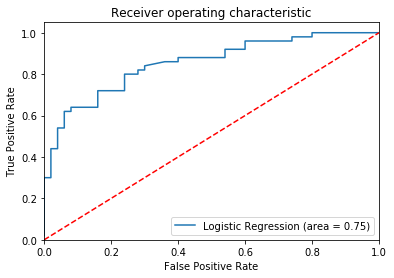

In [136]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(X_test_target_num, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(X_test_target_num, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## SVM

In [337]:
predicted_SVM =SVM_clf.predict(X_test)
np.mean(predicted_SVM == X_test_target_num)

0.73999999999999999

In [338]:
target_names = ['F','T']
print(classification_report(X_test_target_num, predicted_SVM, target_names=target_names))

             precision    recall  f1-score   support

          F       0.71      0.80      0.75        50
          T       0.77      0.68      0.72        50

avg / total       0.74      0.74      0.74       100



## Neural Network

In [139]:
predicted_NN =NN_clf.predict(X_test)
np.mean(predicted_NN == X_test_target_num)

0.76000000000000001

In [140]:
target_names = ['F','T']
print(classification_report(X_test_target_num, predicted_NN, target_names=target_names))

             precision    recall  f1-score   support

          F       0.84      0.64      0.73        50
          T       0.71      0.88      0.79        50

avg / total       0.78      0.76      0.76       100



## Bagging

In [340]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

seed = 7
cart = LogisticRegression()
#cart = DecisionTreeClassifier()
#cart = svm.LinearSVC()
#cart = MultinomialNB()
num_trees = 7
# 7:79% LR
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
#model.fit(chi_filter_training, y_resampled)
#model.fit(X_tfidf_matrix, Y_train)
model.fit(X_resampled, y_resampled)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=7, n_jobs=1, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

In [341]:
import sklearn
predicted_Bagging =model.predict(X_test)
sklearn.metrics.accuracy_score(X_test_target_num,predicted_Bagging) 
#sklearn.metrics.precision_score(X_test_target_num,predicted_Bagging) 
#sklearn.metrics.recall_score(X_test_target_num,predicted_Bagging) 
#sklearn.metrics.f1_score(X_test_target_num,predicted_Bagging) 

target_names = ['F','T']
print(classification_report(X_test_target_num, predicted_Bagging, target_names=target_names))

             precision    recall  f1-score   support

          F       0.72      0.92      0.81        50
          T       0.89      0.64      0.74        50

avg / total       0.80      0.78      0.78       100



## Boosting

In [451]:
from sklearn.ensemble import AdaBoostClassifier
seed = 2
cart = LogisticRegression()
#cart = DecisionTreeClassifier()
#cart = svm.LinearSVC()
#cart = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15, ), random_state=1)
num_trees = 7
model = AdaBoostClassifier(base_estimator=cart, random_state=seed)
Adaboost_clf = model.fit(chi_filter_training, y_resampled)
#Adaboost_clf = model.fit(X_tfidf_matrix, Y_train)
#model.fit(X_resampled, y_resampled)

predicted_Adaboosting =model.predict(X_test)
np.mean(predicted_Adaboosting == X_test_target_num)

0.78000000000000003

In [452]:
target_names = ['F','T']
print(classification_report(X_test_target_num, predicted_Adaboosting, target_names=target_names))

             precision    recall  f1-score   support

          F       0.73      0.90      0.80        50
          T       0.87      0.66      0.75        50

avg / total       0.80      0.78      0.78       100



## Ensemble Learning

In [492]:
#https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
#http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics        A variety of measurement approaches
#http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter    10-cross validation
#https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
#cart = svm.LinearSVC()
#cart = LogisticRegression()
num_trees = 27
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
accuracy = model_selection.cross_val_score(model, chi_filter_training, y_resampled, cv=kfold)
print(accuracy)

[ 0.86372361  0.743762    0.77735125  0.74856046  0.73487032  0.87512008
  0.97598463  0.98270893  0.97886647  0.9807877 ]


In [493]:
precision = model_selection.cross_val_score(model, chi_filter_training, y_resampled, cv=kfold, scoring='precision')
print(precision)

[ 0.8177496   0.          0.          0.          0.          0.79935275
  1.          1.          1.          1.        ]


In [459]:
recall = model_selection.cross_val_score(model, chi_filter_training, y_resampled, cv=kfold, scoring='recall')
print(recall.mean())

/Users/yyb/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/yyb/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/yyb/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/yyb/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.526458613424


In [460]:
f1 = model_selection.cross_val_score(model, chi_filter_training, y_resampled, cv=kfold, scoring='f1')
print(f1.mean())

/Users/yyb/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/yyb/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/yyb/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/yyb/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.554373237273


In [41]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

seed = 7
cart = LogisticRegression()
#cart = DecisionTreeClassifier()
#cart = svm.LinearSVC()
#cart = MultinomialNB()
num_trees = 7
# 7:79% LR
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model.fit(chi_filter_training, y_resampled)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=7, n_jobs=1, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

In [42]:
import sklearn
predicted_Bagging =model.predict(X_test)
sklearn.metrics.accuracy_score(X_test_target_num,predicted_Bagging) 
#sklearn.metrics.precision_score(X_test_target_num,predicted_Bagging) 
#sklearn.metrics.recall_score(X_test_target_num,predicted_Bagging) 
#sklearn.metrics.f1_score(X_test_target_num,predicted_Bagging) 


0.75

In [43]:
target_names = ['F','T']
print(classification_report(X_test_target_num, predicted_Bagging, target_names=target_names))

             precision    recall  f1-score   support

          F       0.70      0.86      0.77        50
          T       0.82      0.64      0.72        50

avg / total       0.76      0.75      0.75       100



In [44]:
####bagging
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
all_list=[]
for i in range(3,30,2):
    temp_list=[]
    for j in range(1,11):
        seed = j
        cart = LogisticRegression()
        num_trees = i
        model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
        model.fit(chi_filter_training, y_resampled)

        predicted_Bagging =model.predict(X_test)
        temp_list.append(np.mean(predicted_Bagging == X_test_target_num))
    new_column = np.array(temp_list)
    all_list.append(new_column)
    print('finish the '+str(i)+' classifier')

finish the 3 classifier
finish the 5 classifier
finish the 7 classifier
finish the 9 classifier
finish the 11 classifier
finish the 13 classifier
finish the 15 classifier
finish the 17 classifier
finish the 19 classifier
finish the 21 classifier
finish the 23 classifier
finish the 25 classifier


KeyboardInterrupt: 

In [297]:
data=np.array(all_list)

In [582]:
np.mean(np.mean(data,axis=1))

0.76149999999999995

In [299]:
dataT=data.T

In [300]:
dataT

array([[ 0.78,  0.77,  0.76,  0.77,  0.77,  0.77,  0.77,  0.76,  0.77,
         0.77,  0.76,  0.76,  0.76,  0.76],
       [ 0.78,  0.79,  0.78,  0.79,  0.78,  0.75,  0.76,  0.76,  0.76,
         0.76,  0.76,  0.76,  0.77,  0.77],
       [ 0.75,  0.77,  0.76,  0.76,  0.77,  0.77,  0.77,  0.77,  0.77,
         0.77,  0.77,  0.77,  0.77,  0.77],
       [ 0.78,  0.78,  0.74,  0.76,  0.76,  0.76,  0.76,  0.76,  0.75,
         0.75,  0.75,  0.76,  0.76,  0.76],
       [ 0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,
         0.75,  0.75,  0.75,  0.75,  0.75],
       [ 0.76,  0.78,  0.78,  0.78,  0.77,  0.77,  0.78,  0.77,  0.76,
         0.78,  0.77,  0.76,  0.77,  0.76],
       [ 0.75,  0.74,  0.75,  0.75,  0.76,  0.76,  0.76,  0.76,  0.76,
         0.76,  0.76,  0.76,  0.76,  0.75],
       [ 0.77,  0.76,  0.76,  0.76,  0.76,  0.76,  0.76,  0.76,  0.76,
         0.76,  0.76,  0.76,  0.76,  0.76],
       [ 0.74,  0.75,  0.76,  0.76,  0.76,  0.76,  0.76,  0.76,  0.77,
         

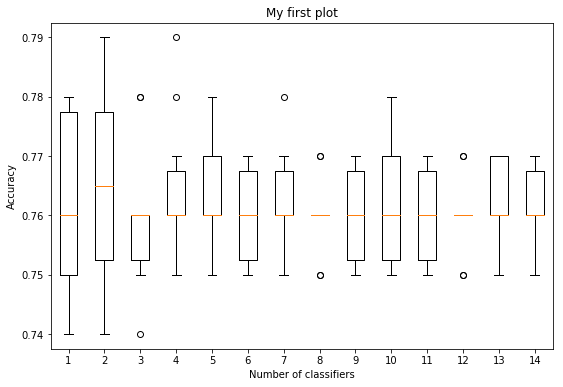

In [301]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(9, 6))
plt.title('My first plot')
plt.ylabel('Accuracy')
plt.xlabel('Number of classifiers')
#index = [0,1,2,3,4]
plt.boxplot(dataT)
plt.show()

In [285]:
a=[[1,1,1],[2,2,2],[3,3,3]]
b=np.array(a)
b

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

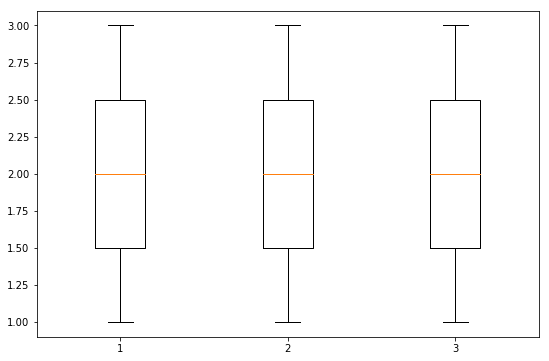

In [284]:
fig = plt.figure(1, figsize=(9, 6))

plt.boxplot(b)
plt.show()

In [524]:
#boosting NB
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

seed = 9
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = MultinomialNB()

model = AdaBoostClassifier(base_estimator=cart, random_state=seed)
accuracy = model_selection.cross_val_score(model, X_tfidf_matrix, Y_train, cv=kfold)
print(accuracy.mean())

/Users/yyb/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:461: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


0.905565217391


In [526]:
precision = model_selection.cross_val_score(model, chi_filter_training, y_resampled, cv=kfold, scoring='precision')
print(precision)

[ 0.92050209  0.          0.          0.          0.          0.81835938
  1.          1.          1.          1.        ]


In [45]:
from sklearn.ensemble import AdaBoostClassifier
seed = 2
cart = LogisticRegression()
#cart = DecisionTreeClassifier()
#cart = svm.LinearSVC()
#cart = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15, ), random_state=1)
num_trees = 7
model = AdaBoostClassifier(base_estimator=cart, random_state=seed)

Adaboost_clf = model.fit(chi_filter_training, y_resampled)

In [46]:
predicted_Adaboosting =model.predict(X_test)
np.mean(predicted_Adaboosting == X_test_target_num)

0.78000000000000003

In [47]:
target_names = ['F','T']
print(classification_report(X_test_target_num, predicted_Adaboosting, target_names=target_names))

             precision    recall  f1-score   support

          F       0.71      0.94      0.81        50
          T       0.91      0.62      0.74        50

avg / total       0.81      0.78      0.77       100



In [577]:
#
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(random_state=1)
#clf2 = RandomForestClassifier(random_state=1)
#clf3 = svm.LinearSVC()
clf2 = MultinomialNB()
clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15, ), random_state=1)

#eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft',weights=[1,1,1]).fit(chi_filter_training, y_resampled)


#for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression','naive Bayes','Neural Network','Ensemble']):
    #scores = cross_val_score(clf, chi_filter_training, y_resampled, cv=10, scoring='accuracy')
    #print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

predicted_clf =eclf.predict(X_test)
np.mean(predicted_clf == X_test_target_num)

0.76000000000000001

In [549]:
#Stochastic Gradient Boosting
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 15
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model,chi_filter_training, y_resampled, cv=kfold)
print(results.mean())

0.293932454583


## User Detecting

In [ ]:
#列表，get每个文件名
#把每个文件读入数据框
    #走preprocessing那一套
    #获取tweets总数量
    #丢进model,计算被判定为正的tweets数量
    #得到一个比例，存到一个字典里，格式为{文件名:[tweet总数，识别相关数，比值]}

In [406]:
follower_folder_path='/Users/yyb/Documents/5920_Projects/followers_tweets_original/'
follower_filenames=[f for f in listdir(follower_folder_path) if isfile(join(follower_folder_path,f))]
try:
    follower_filenames.remove('.DS_Store')
except:
    pass

In [467]:
follower_target_list=[]
count=0
for name in follower_filenames:
    name=name.split('.')[0]
    N_df=read_as_df(follower_folder_path,name)
    
    if len(N_df)<10:
        pass
    else:
        follower_tweets=list(N_df['tweets'])
        follower_tweets=[str(tweet) for tweet in follower_tweets]
        follower_tweets=strip_drop_duplicated(follower_tweets)
        follower_tweets=remove_symbols(follower_tweets)
        follower_tweets=standardize(follower_tweets)
        follower_tweets=stop_word_removal(follower_tweets)
        follower_tweets=lematization(follower_tweets)
        total_tweets_num = len(follower_tweets)
        if total_tweets_num<=10:
            continue
        else:
            test_test=list_to_string(follower_tweets)
            t_test = ch2.transform(tfidf_vectorizer.transform(test_test))
            t_test.shape
            target_num=list(Adaboost_clf.predict(t_test)).count(1)

            ratio=float(target_num/total_tweets_num)

            follower_target_list.append([name,total_tweets_num, target_num, ratio])
            count+=1
            print('finish the '+str(count)+' user!')

finish the 1 user!
finish the 2 user!


Skipping line 115: '^' expected after '"'
Skipping line 474: '^' expected after '"'


finish the 3 user!
finish the 4 user!
finish the 5 user!
finish the 6 user!


Skipping line 23: '^' expected after '"'
Skipping line 55: '^' expected after '"'
Skipping line 59: '^' expected after '"'
Skipping line 61: '^' expected after '"'
Skipping line 92: '^' expected after '"'
Skipping line 107: '^' expected after '"'
Skipping line 121: '^' expected after '"'
Skipping line 125: '^' expected after '"'
Skipping line 129: '^' expected after '"'


finish the 7 user!
finish the 8 user!
finish the 9 user!


Skipping line 2: '^' expected after '"'


finish the 10 user!
finish the 11 user!
finish the 12 user!


Skipping line 121: '^' expected after '"'


finish the 13 user!
finish the 14 user!


Skipping line 303: '^' expected after '"'


finish the 15 user!


Skipping line 48: '^' expected after '"'
Skipping line 116: unexpected end of data


finish the 16 user!
finish the 17 user!
finish the 18 user!
finish the 19 user!
finish the 20 user!
finish the 21 user!
finish the 22 user!


Skipping line 407: '^' expected after '"'
Skipping line 360: Expected 3 fields in line 360, saw 7


finish the 23 user!
finish the 24 user!


Skipping line 90: '^' expected after '"'
Skipping line 676: '^' expected after '"'
Skipping line 725: '^' expected after '"'
Skipping line 737: '^' expected after '"'


finish the 25 user!
finish the 26 user!


Skipping line 10: '^' expected after '"'
Skipping line 72: '^' expected after '"'
Skipping line 210: '^' expected after '"'
Skipping line 318: '^' expected after '"'


finish the 27 user!


Skipping line 202: '^' expected after '"'
Skipping line 808: unexpected end of data


finish the 28 user!
finish the 29 user!


Skipping line 25: '^' expected after '"'
Skipping line 74: '^' expected after '"'
Skipping line 167: '^' expected after '"'
Skipping line 170: '^' expected after '"'
Skipping line 176: '^' expected after '"'
Skipping line 182: '^' expected after '"'
Skipping line 184: '^' expected after '"'
Skipping line 4: Expected 3 fields in line 4, saw 5
Skipping line 6: Expected 3 fields in line 6, saw 5
Skipping line 7: Expected 3 fields in line 7, saw 5
Skipping line 8: Expected 3 fields in line 8, saw 5
Skipping line 49: Expected 3 fields in line 49, saw 5
Skipping line 51: Expected 3 fields in line 51, saw 5
Skipping line 72: Expected 3 fields in line 72, saw 5
Skipping line 87: Expected 3 fields in line 87, saw 5
Skipping line 101: Expected 3 fields in line 101, saw 5
Skipping line 127: Expected 3 fields in line 127, saw 5
Skipping line 130: Expected 3 fields in line 130, saw 5


finish the 30 user!
finish the 31 user!


Skipping line 68: '^' expected after '"'
Skipping line 264: '^' expected after '"'
Skipping line 286: '^' expected after '"'
Skipping line 393: '^' expected after '"'
Skipping line 395: '^' expected after '"'
Skipping line 511: '^' expected after '"'
Skipping line 512: '^' expected after '"'
Skipping line 540: '^' expected after '"'
Skipping line 544: '^' expected after '"'
Skipping line 610: '^' expected after '"'
Skipping line 762: '^' expected after '"'
Skipping line 812: '^' expected after '"'


finish the 32 user!
finish the 33 user!


Skipping line 11: '^' expected after '"'
Skipping line 320: '^' expected after '"'
Skipping line 507: '^' expected after '"'
Skipping line 508: '^' expected after '"'
Skipping line 653: '^' expected after '"'
Skipping line 690: '^' expected after '"'
Skipping line 691: '^' expected after '"'
Skipping line 733: '^' expected after '"'


finish the 34 user!
finish the 35 user!
finish the 36 user!
finish the 37 user!
finish the 38 user!
finish the 39 user!


Skipping line 166: '^' expected after '"'


finish the 40 user!


Skipping line 76: '^' expected after '"'
Skipping line 157: '^' expected after '"'
Skipping line 162: '^' expected after '"'


finish the 41 user!
finish the 42 user!


Skipping line 11: '^' expected after '"'


finish the 43 user!


Skipping line 7: '^' expected after '"'
Skipping line 53: '^' expected after '"'
Skipping line 70: '^' expected after '"'
Skipping line 80: '^' expected after '"'
Skipping line 215: '^' expected after '"'
Skipping line 249: '^' expected after '"'
Skipping line 284: '^' expected after '"'
Skipping line 309: '^' expected after '"'
Skipping line 389: '^' expected after '"'
Skipping line 390: '^' expected after '"'
Skipping line 391: '^' expected after '"'
Skipping line 392: '^' expected after '"'
Skipping line 394: '^' expected after '"'


finish the 44 user!
finish the 45 user!


Skipping line 111: '^' expected after '"'
Skipping line 115: '^' expected after '"'
Skipping line 283: '^' expected after '"'
Skipping line 284: '^' expected after '"'
Skipping line 418: '^' expected after '"'
Skipping line 476: '^' expected after '"'
Skipping line 529: '^' expected after '"'
Skipping line 539: '^' expected after '"'
Skipping line 542: '^' expected after '"'
Skipping line 543: '^' expected after '"'
Skipping line 676: '^' expected after '"'


finish the 46 user!
finish the 47 user!
finish the 48 user!


Skipping line 1: '^' expected after '"'
Skipping line 135: '^' expected after '"'
Skipping line 33: '^' expected after '"'


finish the 49 user!
finish the 50 user!
finish the 51 user!


Skipping line 473: '^' expected after '"'


finish the 52 user!
finish the 53 user!
finish the 54 user!
finish the 55 user!


Skipping line 94: '^' expected after '"'


finish the 56 user!
finish the 57 user!


Skipping line 33: '^' expected after '"'


finish the 58 user!
finish the 59 user!


Skipping line 22: '^' expected after '"'
Skipping line 109: Expected 3 fields in line 109, saw 4


finish the 60 user!
finish the 61 user!
finish the 62 user!
finish the 63 user!
finish the 64 user!

Skipping line 12: '^' expected after '"'



finish the 65 user!
finish the 66 user!


Skipping line 20: '^' expected after '"'


finish the 67 user!
finish the 68 user!


Skipping line 52: '^' expected after '"'


finish the 69 user!
finish the 70 user!


Skipping line 171: '^' expected after '"'
Skipping line 303: '^' expected after '"'


finish the 71 user!
finish the 72 user!
finish the 73 user!
finish the 74 user!


Skipping line 7: '^' expected after '"'
Skipping line 39: '^' expected after '"'
Skipping line 49: '^' expected after '"'
Skipping line 102: '^' expected after '"'
Skipping line 195: '^' expected after '"'
Skipping line 551: '^' expected after '"'


finish the 75 user!


Skipping line 114: '^' expected after '"'


finish the 76 user!
finish the 77 user!


Skipping line 172: '^' expected after '"'


finish the 78 user!
finish the 79 user!
finish the 80 user!


Skipping line 223: '^' expected after '"'


finish the 81 user!
finish the 82 user!


Skipping line 17: '^' expected after '"'
Skipping line 96: '^' expected after '"'
Skipping line 184: '^' expected after '"'
Skipping line 218: '^' expected after '"'
Skipping line 319: '^' expected after '"'
Skipping line 345: '^' expected after '"'
Skipping line 375: '^' expected after '"'


finish the 83 user!
finish the 84 user!
finish the 85 user!
finish the 86 user!
finish the 87 user!


Skipping line 15: '^' expected after '"'
Skipping line 719: '^' expected after '"'


finish the 88 user!
finish the 89 user!
finish the 90 user!
finish the 91 user!


Skipping line 119: '^' expected after '"'


finish the 92 user!
finish the 93 user!


Skipping line 46: '^' expected after '"'
Skipping line 48: '^' expected after '"'
Skipping line 77: '^' expected after '"'
Skipping line 147: '^' expected after '"'
Skipping line 188: '^' expected after '"'
Skipping line 277: '^' expected after '"'
Skipping line 278: '^' expected after '"'
Skipping line 279: '^' expected after '"'
Skipping line 280: '^' expected after '"'
Skipping line 320: '^' expected after '"'
Skipping line 373: '^' expected after '"'
Skipping line 507: '^' expected after '"'
Skipping line 541: '^' expected after '"'
Skipping line 551: '^' expected after '"'
Skipping line 565: '^' expected after '"'
Skipping line 581: '^' expected after '"'
Skipping line 588: '^' expected after '"'


finish the 94 user!
finish the 95 user!


Skipping line 170: '^' expected after '"'


finish the 96 user!


Skipping line 24: '^' expected after '"'


finish the 97 user!


Skipping line 100: '^' expected after '"'


finish the 98 user!
finish the 99 user!
finish the 100 user!
finish the 101 user!
finish the 102 user!
finish the 103 user!
finish the 104 user!


Skipping line 198: '^' expected after '"'
Skipping line 241: '^' expected after '"'
Skipping line 276: '^' expected after '"'
Skipping line 341: '^' expected after '"'
Skipping line 398: '^' expected after '"'
Skipping line 496: '^' expected after '"'
Skipping line 549: '^' expected after '"'
Skipping line 551: '^' expected after '"'
Skipping line 592: '^' expected after '"'
Skipping line 627: '^' expected after '"'
Skipping line 640: '^' expected after '"'


finish the 105 user!
finish the 106 user!


Skipping line 87: '^' expected after '"'
Skipping line 166: '^' expected after '"'
Skipping line 199: '^' expected after '"'
Skipping line 264: '^' expected after '"'
Skipping line 277: '^' expected after '"'
Skipping line 306: '^' expected after '"'
Skipping line 312: '^' expected after '"'
Skipping line 314: '^' expected after '"'
Skipping line 386: '^' expected after '"'
Skipping line 389: '^' expected after '"'
Skipping line 391: '^' expected after '"'
Skipping line 405: '^' expected after '"'
Skipping line 577: '^' expected after '"'
Skipping line 582: '^' expected after '"'
Skipping line 614: '^' expected after '"'
Skipping line 651: '^' expected after '"'


finish the 107 user!


Skipping line 591: '^' expected after '"'
Skipping line 728: Expected 3 fields in line 728, saw 5


finish the 108 user!
finish the 109 user!


Skipping line 32: '^' expected after '"'


finish the 110 user!
finish the 111 user!


Skipping line 28: '^' expected after '"'


finish the 112 user!


Skipping line 253: '^' expected after '"'
Skipping line 256: '^' expected after '"'
Skipping line 257: '^' expected after '"'
Skipping line 258: '^' expected after '"'
Skipping line 259: '^' expected after '"'
Skipping line 262: '^' expected after '"'
Skipping line 263: '^' expected after '"'


finish the 113 user!
finish the 114 user!
finish the 115 user!
finish the 116 user!


Skipping line 32: '^' expected after '"'


finish the 117 user!


Skipping line 10: '^' expected after '"'
Skipping line 11: '^' expected after '"'
Skipping line 82: '^' expected after '"'
Skipping line 358: '^' expected after '"'
Skipping line 383: '^' expected after '"'
Skipping line 400: '^' expected after '"'


finish the 118 user!


Skipping line 74: '^' expected after '"'
Skipping line 116: '^' expected after '"'
Skipping line 152: '^' expected after '"'
Skipping line 236: '^' expected after '"'


finish the 119 user!


Skipping line 25: '^' expected after '"'
Skipping line 26: '^' expected after '"'
Skipping line 27: '^' expected after '"'
Skipping line 28: '^' expected after '"'
Skipping line 196: '^' expected after '"'
Skipping line 333: '^' expected after '"'


finish the 120 user!
finish the 121 user!


Skipping line 413: '^' expected after '"'
Skipping line 428: '^' expected after '"'
Skipping line 181: Expected 3 fields in line 181, saw 5


finish the 122 user!
finish the 123 user!
finish the 124 user!


Skipping line 347: '^' expected after '"'
Skipping line 452: '^' expected after '"'
Skipping line 533: '^' expected after '"'


finish the 125 user!
finish the 126 user!
finish the 127 user!
finish the 128 user!


Skipping line 38: '^' expected after '"'
Skipping line 40: '^' expected after '"'


finish the 129 user!
finish the 130 user!


Skipping line 159: '^' expected after '"'
Skipping line 237: '^' expected after '"'
Skipping line 257: '^' expected after '"'
Skipping line 308: '^' expected after '"'
Skipping line 393: '^' expected after '"'
Skipping line 406: '^' expected after '"'
Skipping line 599: '^' expected after '"'
Skipping line 615: '^' expected after '"'
Skipping line 636: '^' expected after '"'


finish the 131 user!


Skipping line 10: '^' expected after '"'
Skipping line 29: '^' expected after '"'
Skipping line 130: '^' expected after '"'
Skipping line 168: '^' expected after '"'
Skipping line 256: '^' expected after '"'
Skipping line 288: '^' expected after '"'
Skipping line 611: '^' expected after '"'


finish the 132 user!


Skipping line 39: '^' expected after '"'
Skipping line 236: '^' expected after '"'
Skipping line 298: '^' expected after '"'
Skipping line 541: '^' expected after '"'


finish the 133 user!
finish the 134 user!


Skipping line 11: '^' expected after '"'
Skipping line 113: '^' expected after '"'
Skipping line 362: '^' expected after '"'
Skipping line 421: '^' expected after '"'
Skipping line 486: '^' expected after '"'


finish the 135 user!
finish the 136 user!


Skipping line 84: '^' expected after '"'


finish the 137 user!
finish the 138 user!


Skipping line 363: '^' expected after '"'
Skipping line 452: '^' expected after '"'
Skipping line 753: '^' expected after '"'


finish the 139 user!


Skipping line 112: '^' expected after '"'


finish the 140 user!
finish the 141 user!
finish the 142 user!
finish the 143 user!
finish the 144 user!
finish the 145 user!


Skipping line 18: '^' expected after '"'
Skipping line 54: '^' expected after '"'
Skipping line 91: '^' expected after '"'
Skipping line 135: '^' expected after '"'
Skipping line 154: '^' expected after '"'


finish the 146 user!


In [475]:
df_follower=pd.DataFrame(follower_target_list,columns=['name','total_tweets','target_tweets','ratio'])
df_follower.sort_values(by=['ratio'],ascending=False).head(10)
#= df.sort(['A', 'B'], ascending=[1, 0])

,name,total_tweets,target_tweets,ratio
64,SamsungBilgim,38,26,0.684211
136,BrodaWatchFaces,45,29,0.644444
37,de09857681,32,19,0.593750
137,ccelikel,54,29,0.537037
105,SamsungGearWF,15,8,0.533333
63,GreatwallTEC,21,11,0.523810
139,PhoneGenesis,262,135,0.515267
20,Sksoans1,163,74,0.453988
65,BUnboxed,27,12,0.444444
44,geetsethi84,24,10,0.416667


In [476]:
#df_follower[df_follower <= 0.7]
new_follower=df_follower[(df_follower["ratio"] > 0.05) & (df_follower["ratio"] <= 0.3)]
new_follower.sort_values(by=['ratio'],ascending=False)

,name,total_tweets,target_tweets,ratio
52,openwavesg,260,78,0.300000
79,govindgoyal41,14,4,0.285714
126,vrzone,115,30,0.260870
69,Shafiudeen68,24,6,0.250000
71,ernest_febb,12,3,0.250000
122,Bala97591042,12,3,0.250000
88,atul_pratik,12,3,0.250000
96,wheninsingapura,85,21,0.247059
120,fieryfist88,25,6,0.240000
51,zgcnkygsz,249,59,0.236948


In [464]:
N_df=read_as_df(follower_folder_path,'ramkheelarimee1')
follower_tweets=list(N_df['tweets'])
follower_tweets=[str(tweet) for tweet in follower_tweets]
follower_tweets=strip_drop_duplicated(follower_tweets)
follower_tweets=remove_symbols(follower_tweets)
follower_tweets=standardize(follower_tweets)
follower_tweets=stop_word_removal(follower_tweets)
follower_tweets=lematization(follower_tweets)
total_tweets_num = len(follower_tweets)

test_test=list_to_string(follower_tweets)
t_test = ch2.transform(tfidf_vectorizer.transform(test_test))
predict_array=Adaboost_clf.predict(t_test)


In [465]:
user_df=pd.DataFrame(test_test,columns=['tweets'])
user_df['predict']=predict_array
user_df.to_csv('/Users/yyb/Documents/5920_Projects/one_user_result.csv')